# **作業一：房價預測**
---

#### 🔰 **參考資料**

+ [**[第 22 天] 機器學習（2）複迴歸與 Logistic 迴歸**](https://github.com/yaojenkuo/learn_python_for_a_r_user/blob/master/day22.md)

#### 🔰 **資料集**

In [205]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
# 我們直接從 GitHub 的 raw webpage 抓下 dataset
url = "https://raw.githubusercontent.com/microsoft/Reactors/main/microsoft-learn-resources/Intro-python-data-science/Data/Housing_Dataset_Sample.csv"
df = pd.read_csv(url)
df.head(n=6)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."


In [207]:
X = df.iloc[:,:5] # 僅取資料的前五個欄位作為參數進行預測
y = df['Price']

In [208]:
X  # dataset 中的五欄項目 "該地區平均收入水平" / "該地區房屋平均屋齡" / "該地區房屋平均房數" / "該地區房屋平均臥室數" / "該地區人口數"
   # 作為測試集的參數

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [209]:
y  # dataset 中的一欄項目 "房價"  
   # 是已知的答案 

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [210]:
X.isnull().sum() # 看起來 X 沒有缺失值

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
dtype: int64

#### 🔰 **變數的顯著性**

In [211]:
from sklearn.feature_selection import f_regression
# 其實我們應該先檢測變數的顯著性，對嗎？
# p-value
f_regression(X, y)[1]

array([0.00000000e+000, 4.94475003e-251, 6.16589256e-132, 3.80888499e-034,
       1.73639205e-200])

> p-value 皆遠小於 0.05。

> 這表示 X 的五欄變數都高度顯著，y 的差異不僅僅是隨機差異引起的，的確可能與 X 有相關。

#### 🔰 **簡單線性回歸模型**

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series

# 我們通常不會把整個 dataset 都丟進去訓練
# 而是將 dataset 切割成 training set (訓練集，佔70%，在這裡是3500筆) 和 testing set (測試集，佔30%，在這裡是1500筆)
# 通過比對兩者的分數，我們可以避免我們所訓練的模型 overfitting
# 例如模型可能出現對 public dataset 的預測極度良好，卻對 private dataset (在現實生活中，就是沒看過的資料) 的預測較差的狀況

In [213]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# 雖然還沒開始系統性地學習統計學
# 但我認為這裡的線性回歸應該是多變數線性回歸
# 因為 x 有 5 個變數，而 y 僅有 1 個變數

# 這裡以訓練集訓練模型，試圖找出一個線性回歸直線
reg.fit(X_train, y_train)

# 用我們找出的線性回歸直線預測測試集的房價
y_pred_test = reg.predict(X_test)

#### 🔰 **績效指標**

In [214]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 和答案相比，看看吻合度有多高
# 其實判斷一個模型的績效有三種指標可以參考
def score(X_test, y_test, y_pred_test):
    mse = mean_squared_error(y_test, y_pred_test)
    r_squared = r2_score(y_test, y_pred_test)
    adj_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    return f"{mse=}, {r_squared=}, {adj_r_squared=}"

In [215]:
score(X_test, y_test, y_pred_test)

'mse=9879448079.694202, r_squared=0.9211543991762885, adj_r_squared=0.9208905250102118'

+ **均方誤差 Mean Squared Error**
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

+ **R平方 R-squared**
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

+ **調整R平方 Adjusted R-squared**


$$\text{Adjusted } R^2 = 1 - \frac{(1 - R^2) \cdot (n - 1)}{n - k - 1}$$

#### 🔰 **繪製預測結果**

In [216]:
from matplotlib.figure import Figure
import matplotlib.style as style
style.use('seaborn-v0_8-whitegrid')

def draw(X_test, y_test, y_pred_test):
    fig: Figure
    ax: list[plt.Axes]
    fig, ax = plt.subplots(1, 5, figsize=(20, 4))
    for i, col, in enumerate(X_test):
        ax[i].scatter(X_test[col], y_test, label='True data', s=1)
        ax[i].scatter(X_test[col], y_pred_test, label='Predictions', s=1)
        ax[i].set_xlabel(col)
    ax[0].set_ylabel("Price")
    ax[4].legend(loc='center left', bbox_to_anchor=(1, 0.5))

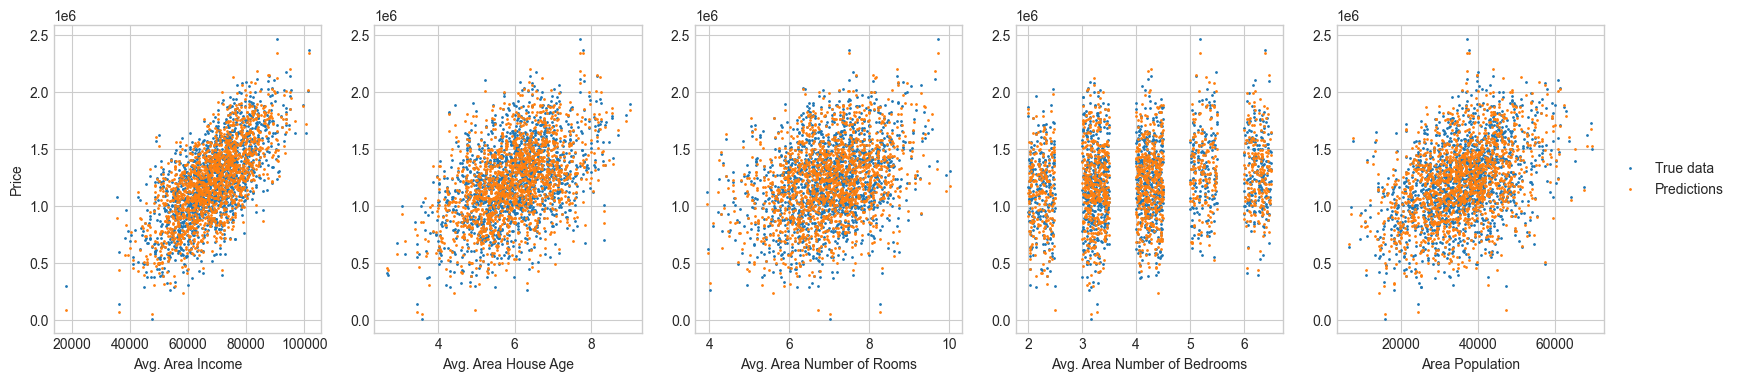

In [217]:
draw(X_test, y_test, y_pred_test)
plt.show()

#### 🔰 **神經網路迴歸模型**

Epoch 1/50
117/117 [==============================] - 1s 806us/step - loss: 1393557635072.0000
Epoch 2/50
117/117 [==============================] - 0s 746us/step - loss: 277044232192.0000
Epoch 3/50
117/117 [==============================] - 0s 711us/step - loss: 64668667904.0000
Epoch 4/50
117/117 [==============================] - 0s 733us/step - loss: 64560865280.0000
Epoch 5/50
117/117 [==============================] - 0s 751us/step - loss: 64386953216.0000
Epoch 6/50
117/117 [==============================] - 0s 751us/step - loss: 64228683776.0000
Epoch 7/50
117/117 [==============================] - 0s 733us/step - loss: 64087412736.0000
Epoch 8/50
117/117 [==============================] - 0s 768us/step - loss: 64100372480.0000
Epoch 9/50
117/117 [==============================] - 0s 747us/step - loss: 63948660736.0000
Epoch 10/50
117/117 [==============================] - 0s 940us/step - loss: 63800250368.0000
Epoch 11/50
117/117 [==============================] - 0s 750us/st

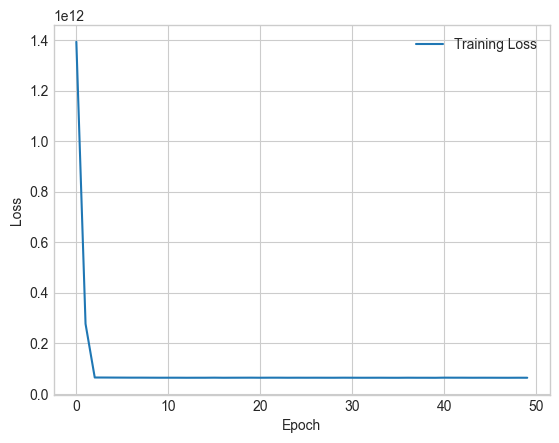

In [233]:
# 試試看神經網路迴歸吧？
import tensorflow as tf

class LossCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs['loss'])

    def show_loss(self):
        plt.plot(self.losses, label='Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# 紀錄 loss
loss_callback = LossCallback()

# 輸入維度為5 (因為我們有5個輸入變數)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X_train, y_train, epochs=50, batch_size=30, callbacks=[loss_callback])

loss_callback.show_loss()

In [227]:
# 進行預測
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

47/47 [==============================] - 0s 631us/step


In [228]:
score(X_train, y_train, y_pred_train)

'mse=63600471744.281944, r_squared=0.48822756263412004, adj_r_squared=0.48749520367967547'

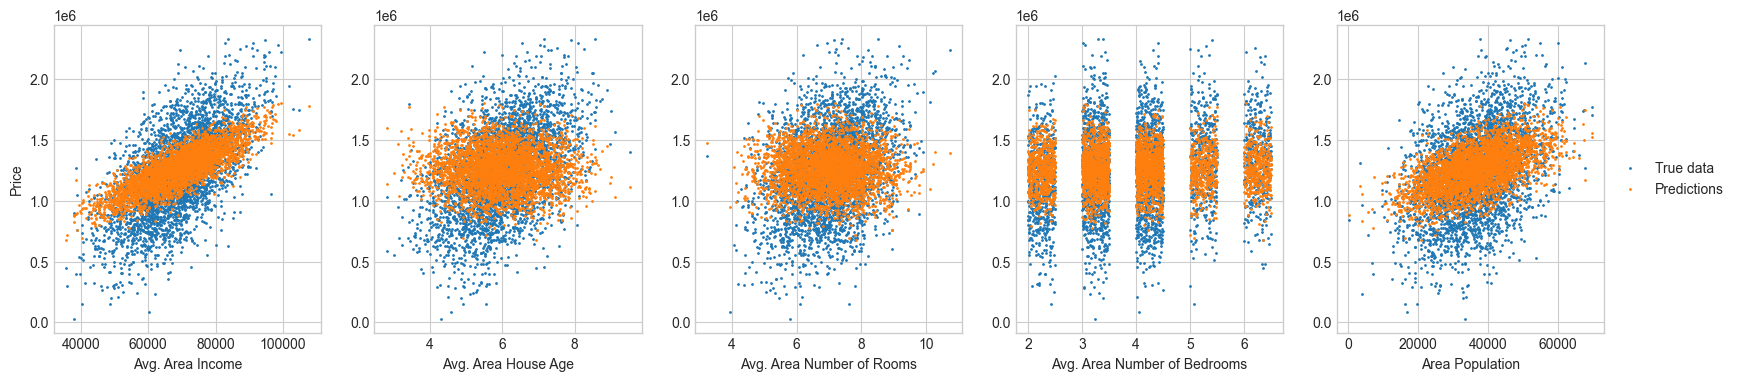

In [229]:
draw(X_train, y_train, y_pred_train)
plt.show()

In [230]:
score(X_test, y_test, y_pred_test)

'mse=59769613159.89596, r_squared=0.5229924766466636, adj_r_squared=0.5213960659259362'

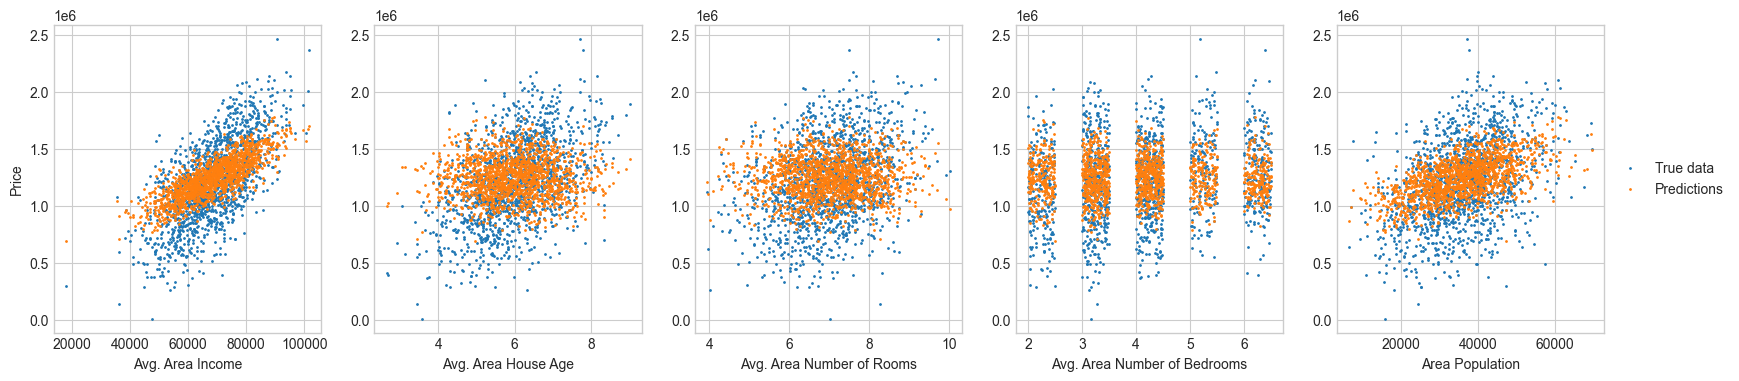

In [231]:
draw(X_test, y_test, y_pred_test)
plt.show()

> 不管怎麼調整參數，結果都特別差，可也沒有 overfitting，難道是 model bias 嗎？